In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%xmode plain
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

Exception reporting mode: Plain


In [3]:
deliveries = pd.read_csv('deliveries.csv')

In [4]:
deliveries_df = deliveries.copy()
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [5]:
deliveries_df['batting_team'].unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions'], dtype=object)

In [6]:
deliveries_df = deliveries_df[deliveries_df['batting_team'].isin(['Kolkata Knight Riders', 'Mumbai Indians', 'Royal Challengers Bangalore',
                                                                'Delhi Daredevils'])]
deliveries_df = deliveries_df[deliveries_df['bowling_team'].isin(['Kolkata Knight Riders', 'Mumbai Indians', 'Royal Challengers Bangalore',
                                                                'Delhi Daredevils'])]
deliveries_df['batting_team'].unique(), deliveries_df['bowling_team'].unique()

(array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
        'Mumbai Indians', 'Delhi Daredevils'], dtype=object),
 array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
        'Mumbai Indians', 'Delhi Daredevils'], dtype=object))

In [48]:
deliveries_df_gp = deliveries_df.groupby(('match_id', 'batting_team', 'bowling_team'))
total_runs_df =  deliveries_df_gp.agg({'total_runs': 'sum'})
total_runs_df.head(10)

total_runs
match_id batting_team                bowling_team                           
1        Kolkata Knight Riders       Royal Challengers Bangalore         222
         Royal Challengers Bangalore Kolkata Knight Riders                82
4        Mumbai Indians              Royal Challengers Bangalore         165
         Royal Challengers Bangalore Mumbai Indians                      166
16       Kolkata Knight Riders       Mumbai Indians                      137
         Mumbai Indians              Kolkata Knight Riders               138
17       Delhi Daredevils            Royal Challengers Bangalore         191
         Royal Challengers Bangalore Delhi Daredevils                    181
23       Delhi Daredevils            Mumbai Indians                      133
         Mumbai Indians              Delhi Daredevils                    162

In [8]:
match_ids_filter = list(total_runs_df.index.levels[0])

In [9]:
matches = pd.read_csv('matches.csv')

In [10]:
matches_df = matches.copy()
matches_df['date'] = pd.to_datetime(matches_df['date'], yearfirst=True)
matches_df = matches_df.rename(columns={'id': 'match_id'})
matches_df[['match_id', 'season']][-5:]

,match_id,season
572,573,2016
573,574,2016
574,575,2016
575,576,2016
576,577,2016


In [11]:
matches_df = matches_df.set_index('match_id')
matches_df = matches_df.loc[match_ids_filter]
matches_df.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
match_id,,,,,,,,,,,,,,,,,
1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
16,2008,Kolkata,2008-04-29,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,bat,normal,0,Mumbai Indians,0,7,ST Jayasuriya,Eden Gardens,BF Bowden,AV Jayaprakash,NaN
17,2008,Delhi,2008-04-30,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Delhi Daredevils,10,0,GD McGrath,Feroz Shah Kotla,Aleem Dar,I Shivram,NaN
23,2008,Mumbai,2008-05-04,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,29,0,SM Pollock,Dr DY Patil Sports Academy,IL Howell,RE Koertzen,NaN


In [12]:
for in_val in match_ids_filter:
    matches_df.loc[in_val, 'team1_score'] = total_runs_df.loc[in_val]['total_runs'][0]
    matches_df.loc[in_val, 'team2_score'] = total_runs_df.loc[in_val]['total_runs'][1]

In [13]:
matches_df['team1_score'] = matches_df['team1_score'].astype(int)
matches_df['team2_score'] = matches_df['team2_score'].astype(int)

In [242]:
matches_df.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,team1_score,team2_score
match_id,,,,,,,,,,,,,,,,,,,
1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN,222,82
4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN,165,166
16,2008,Kolkata,2008-04-29,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,bat,normal,0,Mumbai Indians,0,7,ST Jayasuriya,Eden Gardens,BF Bowden,AV Jayaprakash,NaN,137,138
17,2008,Delhi,2008-04-30,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Delhi Daredevils,10,0,GD McGrath,Feroz Shah Kotla,Aleem Dar,I Shivram,NaN,191,181
23,2008,Mumbai,2008-05-04,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,29,0,SM Pollock,Dr DY Patil Sports Academy,IL Howell,RE Koertzen,NaN,133,162


In [14]:
columns_to_be_taken = ['season', 'team1', 'team2', 'winner', 'team1_score', 'team2_score']
matches_df1 = matches_df[columns_to_be_taken]
matches_df1.head()

,season,team1,team2,winner,team1_score,team2_score
match_id,,,,,,
1,2008,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,222,82
4,2008,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,165,166
16,2008,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,137,138
17,2008,Delhi Daredevils,Royal Challengers Bangalore,Delhi Daredevils,191,181
23,2008,Mumbai Indians,Delhi Daredevils,Mumbai Indians,133,162


In [15]:
matches_df_team1_gp = matches_df1.groupby(('season', 'team1'))
matches_df_team1_gp_df = matches_df_team1_gp.agg({'team1_score': 'sum'})
matches_df_team1_gp_df.head()

team1_score
season team1                                   
2008   Delhi Daredevils                     191
       Kolkata Knight Riders                665
       Mumbai Indians                       477
       Royal Challengers Bangalore          284
2009   Delhi Daredevils                     134

In [16]:
matches_df_team2_gp = matches_df1.groupby(('season', 'team2'))
matches_df_team2_gp_df = matches_df_team2_gp.agg({'team2_score': 'sum'})
matches_df_team2_gp_df.head()

team2_score
season team2                                   
2008   Delhi Daredevils                     625
       Mumbai Indians                       328
       Royal Challengers Bangalore          553
2009   Delhi Daredevils                     707
       Kolkata Knight Riders                335

In [17]:
matches_df_concat = pd.concat([matches_df_team1_gp_df, matches_df_team2_gp_df], join='outer', axis=1)
matches_df_concat.index.names = ['season', 'team']
matches_df_concat.fillna(0, inplace=True)
matches_df_concat.head()

team1_score  team2_score
season team                                                 
2008   Delhi Daredevils                     191        625.0
       Kolkata Knight Riders                665          0.0
       Mumbai Indians                       477        328.0
       Royal Challengers Bangalore          284        553.0
2009   Delhi Daredevils                     134        707.0

In [18]:
matches_df_concat.isnull().values.any()

False

In [19]:
matches_df_concat['total_score_season'] = matches_df_concat.apply(lambda x: x['team1_score'] + x['team2_score'], axis=1)
matches_df_concat.head()

team1_score  team2_score  \
season team                                                    
2008   Delhi Daredevils                     191        625.0   
       Kolkata Knight Riders                665          0.0   
       Mumbai Indians                       477        328.0   
       Royal Challengers Bangalore          284        553.0   
2009   Delhi Daredevils                     134        707.0   

                                    total_score_season  
season team                                             
2008   Delhi Daredevils                          816.0  
       Kolkata Knight Riders                     665.0  
       Mumbai Indians                            805.0  
       Royal Challengers Bangalore               837.0  
2009   Delhi Daredevils                          841.0

In [20]:
matches_df_concat_ix = matches_df_concat.reset_index()
matches_df_concat_ix.head()

,season,team,team1_score,team2_score,total_score_season
0,2008,Delhi Daredevils,191,625.0,816.0
1,2008,Kolkata Knight Riders,665,0.0,665.0
2,2008,Mumbai Indians,477,328.0,805.0
3,2008,Royal Challengers Bangalore,284,553.0,837.0
4,2009,Delhi Daredevils,134,707.0,841.0


In [21]:
years = matches_df_concat_ix['season'].unique()
kkr_df = matches_df_concat_ix[matches_df_concat_ix['team'].isin(['Kolkata Knight Riders'])]
kkr_df_score = list(kkr_df['total_score_season'].values)

dd_df = matches_df_concat_ix[matches_df_concat_ix['team'].isin(['Delhi Daredevils'])]
dd_df_score = list(dd_df['total_score_season'].values)

mi_df = matches_df_concat_ix[matches_df_concat_ix['team'].isin(['Mumbai Indians'])]
mi_df_score = list(mi_df['total_score_season'].values)

rcb_df = matches_df_concat_ix[matches_df_concat_ix['team'].isin(['Royal Challengers Bangalore'])]
rcb_df_score = list(rcb_df['total_score_season'].values)

len(years), len(kkr_df_score), len(dd_df_score), len(mi_df_score), len(rcb_df_score)

(9, 9, 9, 9, 9)

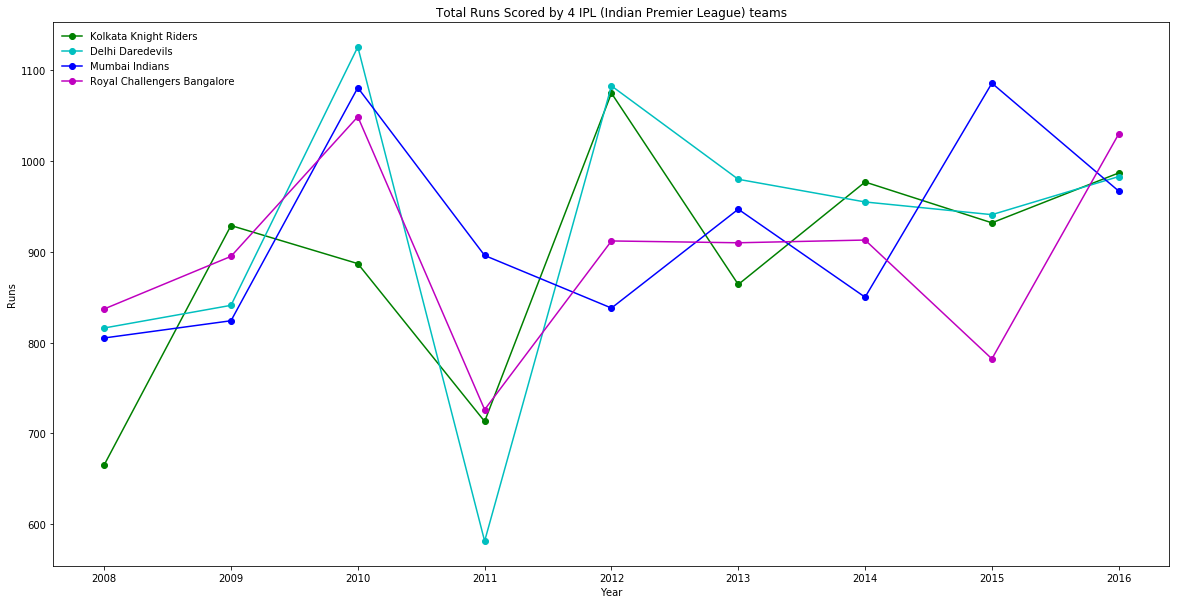

In [22]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)

ax = fig.add_subplot(111)
ax.plot(years, kkr_df_score, 'go-', label='Kolkata Knight Riders')
ax.plot(years, dd_df_score, 'co-', label='Delhi Daredevils')
ax.plot(years, mi_df_score, 'bo-', label='Mumbai Indians')
ax.plot(years, rcb_df_score, 'mo-', label='Royal Challengers Bangalore')
ax.set_title('Total Runs Scored by 4 IPL (Indian Premier League) teams')
ax.set_xlabel('Year')
ax.set_ylabel('Runs')
plt.legend(loc='upper left', frameon=False)
plt.show()

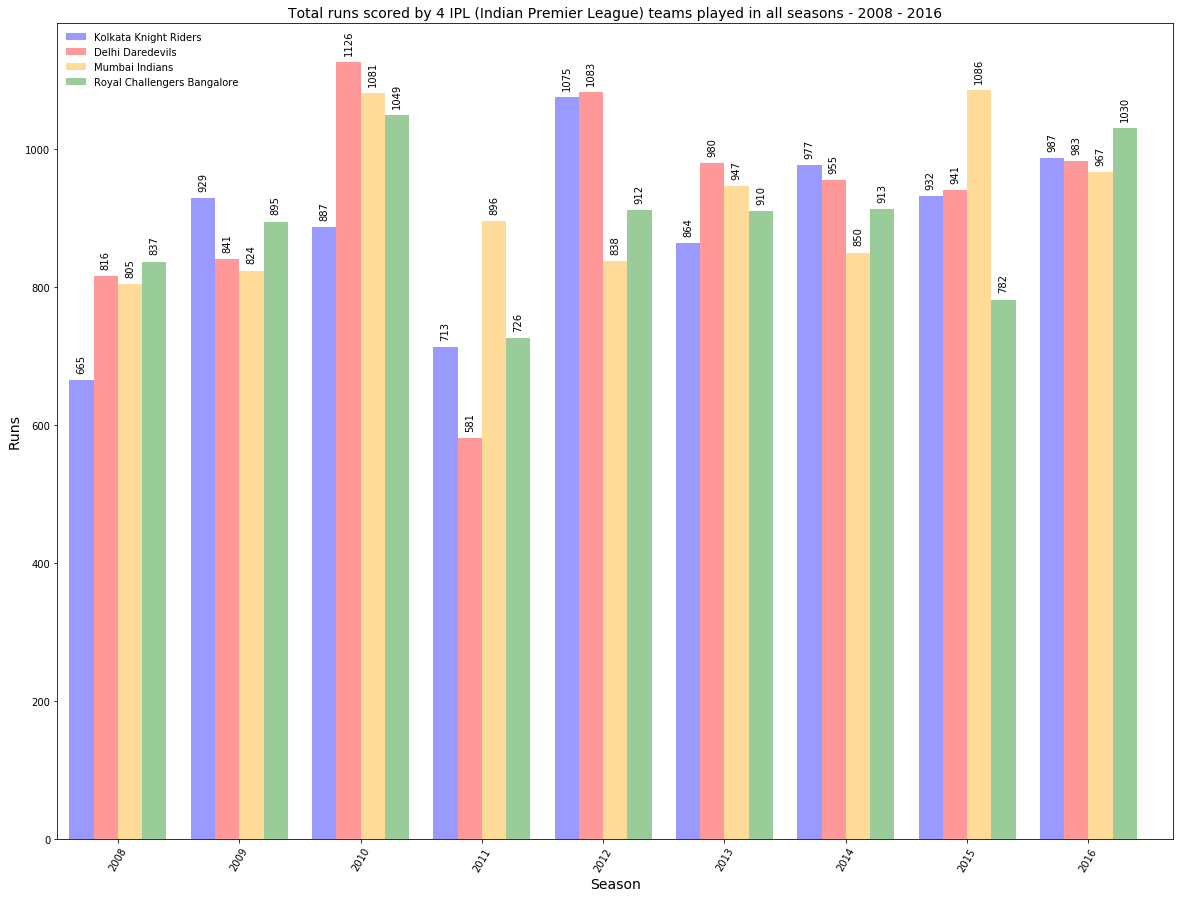

In [51]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(20)

ax = fig.add_subplot(111)
indices = np.arange(len(years))
bar_width = 0.2
ax.bar(indices, kkr_df_score, label='Kolkata Knight Riders', width=bar_width, color='blue', alpha=0.4)

i = 0
for n in kkr_df_score:
    ax.text(i, n+10, int(n), ha='center', rotation=90, va='bottom')
    i = i+1

ax.bar(indices+bar_width, dd_df_score, label='Delhi Daredevils', width=bar_width, color='red', alpha=0.4)

i = 0
for n in dd_df_score:
    ax.text(i+bar_width, n+10, int(n), ha='center', rotation=90, va='bottom')
    i = i+1

ax.bar(indices+(2*bar_width), mi_df_score, label='Mumbai Indians', width=bar_width, color='orange', alpha=0.4)
i = 0
for n in mi_df_score:
    ax.text(i+(2*bar_width), n+10, int(n), ha='center', rotation=90, va='bottom')
    i = i+1

ax.bar(indices+(3*bar_width), rcb_df_score, label='Royal Challengers Bangalore', width=bar_width, color='green', alpha=0.4)
i = 0
for n in rcb_df_score:
    ax.text(i+(3*bar_width), n+10, int(n), ha='center', rotation=90, va='bottom')
    i = i+1

ax.set_title('Total runs scored by 4 IPL (Indian Premier League) teams played in all seasons - 2008 - 2016', fontsize=14)
ax.set_xlabel('Season', fontsize=14)
ax.set_ylabel('Runs', fontsize=14)
ax.set_xlim([-0.2, 9])

ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xticks(indices + (1.5*bar_width))
ax.set_xticklabels(years, rotation=60)

plt.legend(loc='upper left', frameon=False)
plt.savefig('ipl_4teams.png')
plt.show()